# Neural & Behavioral Modeling - Week 4 (Examples)
by Tsung-Ren (Tren) Huang (tren.huang@gmail.com)

#### Netlogo
agent based modeling : 尺度於人
system dynamic versus agent based ?

一個規則一個規則加入



In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Cellular Automata Models

### 1.1a Conway's Game of Life (Parallel Version)
Conway's Game of Life uses the following two rules:

<img src=http://tianfangyetan.net/New1001/chapter4_files/image001.gif>

In [3]:
# The useage of ROLL
x = np.matrix('1 2; 3 4')
print(x)
print(np.roll(x, -1,0))
#logical_and(x==1,x==1)
#logical_or(x==3,x==1)

[[1 2]
 [3 4]]
[[3 4]
 [1 2]]


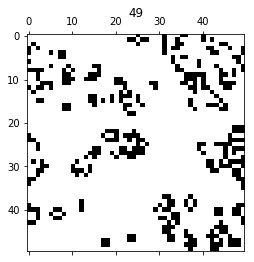

In [11]:
# Parallel Version

# Model parameters:
density=.25 # density of population in the world
sz=50 # size of the grid world

#Initialization:
X=(random.random((sz,sz))<density).astype(int) # A grid world
print(X)
for t in range(50): # Evolution

    # Count how many of the eight neighbors are alive:
    Y=roll(X,-1,0)+ roll(X,1,0)+roll(X,-1,1)+roll(X,1,1)+ \
      roll(roll(X,-1,0),-1,1)+roll(roll(X,-1,0),1,1)+ \
      roll(roll(X,1,0),-1,1)+roll(roll(X,1,0),1,1)
    
    # A live cell w/ 2 live neighbor or any w/ 3 live neighbors:
    X=logical_or(logical_and(X==1,Y==2),Y==3).astype(int)
    
    clf() # clear previous figure
    spy(X); # psy will plot the matrix 
    title(str(t)) # plot the world
    display(gcf()); clear_output(wait=True); # to allow dynamic plots

### 1.1b Conway's Game of Life (Sequential Version)

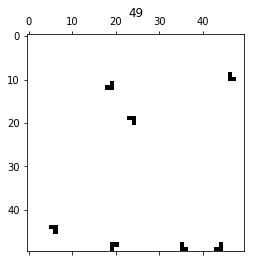

In [4]:
# Model parameters:
density=0.25 # density of population in the world
sz=50 # size of the grid world

world=(random.random((sz,sz))<density).astype(int) # A grid world
new_world=world.copy()

for t in range(50): # Evolution
    # go through all the grid using x and y
    for x in range(sz): # can actually be vectorized to avoid these two loops
        for y in range(sz):
            xp=mod(x+1,sz) # compute x+1 w/ a cyclic boundary
            xm=mod(x-1,sz) # comput x-1 w/ a cyclic boundary
            yp=mod(y+1,sz) # compute y+1 w/ a cyclic boundary
            ym=mod(y-1,sz) # comput y-1 w/ a cyclic boundary
            
            # Count how many of the eight neighbors are alive:
            neighbors=world[x,ym]+world[x,yp]+world[xm,y]+world[xp,y]+ \
                      world[xm,ym]+world[xp,ym]+world[xm,yp]+world[xp,yp]
                
            # A live cell w/ 2 live neighbor or any w/ 3 live neighbors:
            #new_world[x,y]=int((world[x,y]==1 and neighbors==2) or (neighbors==3));
            #new_world[x,y]=int(neighbors==3);
            new_world[x,y]=int(world[x,y]==1 and neighbors==2);
            
    world=new_world.copy() # update synchronously for all (x,y)
    clf() # clear previous figure
    spy(world); title(str(t)) # plot the world
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

### 1.2 Majority Voting Model
This model is a simple cellular automaton that simulates voting distribution by having each patch take a "vote" of its eight surrounding neighbors, then perhaps change its own vote according to the outcome.

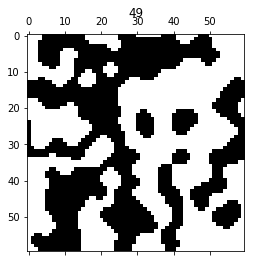

In [4]:
# Model parameters:
proportion=.5 # proportion of (political) party 0
sz=60 # size of the grid world

#Initialization:
X=(random.random((sz,sz))<proportion).astype(int) # A grid world

for t in range(50): # Evolution

    # Count how many of the eight neighbors voting party 1:
    Y=roll(X,-1,0)+ roll(X,1,0)+roll(X,-1,1)+roll(X,1,1)+ \
      roll(roll(X,-1,0),-1,1)+roll(roll(X,-1,0),1,1)+ \
      roll(roll(X,1,0),-1,1)+roll(roll(X,1,0),1,1)
    
    # Majority voting:
    X[Y>4]=1
    X[Y<4]=0
    #X[Y==4]=1-X[Y==4] # behavior during ties
    
    clf() # clear previous figure
    spy(X); title(str(t)) # plot the world
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

## 2 Agent-Based Models
Here are symbols for representing agents:

☍๑•ิ.•ั๑ ๑۩۞۩๑ ♬✿ ☉♡ ♢ ♣ ♤ ♥ ♦ ♧ ♨ ♩ ✙✈ ✉ ✌ ✁ ✎ ✐ ❀ ✰ ❁ ❤ ❥ ❦❧ ➳ ➽ εїз℡❣·۰•●○●ゃōゃ♥ ♡๑۩ﺴ ☜ ☞ ☎ ☏♡ ⊙◎ ☺ ☻✖╄ஐﻬ ► ◄ ▧ ▨ ♨ ◐ ◑ ↔ ↕ ▪ ▫ ☼ ♦ ▀ ▄ █▌ ▐░ ▒ ▬♦ ◊ ◦ ☼ ♠♣ ▣ ▤ ▥ ▦ ▩ ◘ ◙ ◈ ♫ ♬ ♪ ♩ ♭ ♪ の ☆ → あ ぃ ￡ ❤ ❁ ❀ ✿ ✾ ❃ ✺ ❇ ❈ ❊ ❉ ✱ ✲ ✩ ✫ ✬ ✭ ✮ ✰ ☆ ★ ✪ ¤ ☼ ☀ ☽ ☾ ❤ ♡ ღ☻ ☺ ❂ ◕ ⊕ ☉ Θ o O ♋ ☯ ㊝ ⊙ ◎ ◑ ◐ ۰ • ● ▪ ▫ ｡ ﾟ ๑ ☜ ☞ ☂ ♨ ☎ ☏▶ ▷ ◀ ◁ ☀ ☁ ☂ ☃ ☄ ★ ☆ ☇ ☈ ☉ ☊ ☋ ☌ ☍ ☑ ☒☢ ☸ ☹ ☺ ☻ ☼ ☽ ☾ ♠ ♝ ♞♯♩♪♫♬♭♮ ☎ ☏ ☪ ♈ ♨ ºº ₪ ¤ 큐 « »™ ♂✿ ♥ の ↑ ↓ ← → ↖ ↗ ↙ ↘ ㊣ ◎ ○ ● ⊕ ⊙ ○　 △ ▲ ☆ ★ ◇ ◆ ■ □ ▽ ▼ § ￥〒 ￠ ￡ ※ ♀ ♂ © ® ⁂ ℡ ↂ░ ▣ ▤ ▥ ▦ ▧ ✐✌✍✡✓✔✕✖ ♂ ♀ ♥ ♡ ☜ ☞ ☎ ☏ ⊙ ◎ ☺ ☻ ► ◄ ▧ ▨ ♨ ◐ ◑ ↔ ↕ ♥ ♡ ▪ ▫ ☼ ♦ ▀ ▄ █ ▌ ▐ ░ ▒ ▬ ♦ ◊ ◘ ◙ ◦ ☼ ♠ ♣ ▣ ▤ ▥ ▦ ▩ ◘ ◙ ◈ ♫ ♬ ♪ ♩ ♭ ♪ ✄☪☣☢☠㊊㊋㊌㊍㊎㊏ ㊐㊑㊒㊓㊔㊕㊖㊗㊘㊜㊝㊞㊟㊠㊡㊢ ㊣㊤㊥㊦㊧㊨㊩㊪㊫㊬㊭㊮㊯㊰✗✘✚✪✣✤✥✦✧✩✫✬✭✮✯✰ ✱✲✳❃❂❁❀✿✾✽✼✻✺✹✸✷ ✶✵✴❄❅❆❇❈❉❊❋❖☀☂☁【】┱ ┲ ❣ ✪ ✣ ✤ ✥ ✦ ❉ ❥ ❦ ❧ ❃ ❂ ❁ ❀ ✄ ☪ ☣ ☢ ☠ ☭ ♈ ➸ ✓ ✔ ✕ ✖ .: ◢ ◣ ◥ ◤ ▽ ▧ ▨ ▣ ▤ ▥ ▦ ▩ ◘ ◙ ▓ ▒ ░ ™ ℡ 凸 の ๑۞๑ ๑۩ﺴ ﺴ۩๑ o(‧”’‧)o ❆ べò⊹⊱⋛⋋ ⋌⋚⊰⊹ ⓛⓞⓥⓔ ☀ ☼ ☜ ☞ ⊙® ◈ ♦ ◊ ◦ ◇ ◆ εїз❃❂❁❀✿✾✽✼✻✺✹✸✷ ✶✵✴❄❅❆❇❈❉ ❊❋❖❤❥❦❧↔ ↕ ▪ → ︷╅╊✿ (¯`•._.•¯) ❤`•.¸¸.•´´¯`•• .¸¸.•´¯`•.•●•۰• ••.•´¯`•.•• ••.•´¯`•.••—¤÷—(•·÷[ ]÷·•)— ①②③④⑤⑥⑦⑧⑨⑩⑪⑫⑬⑭⑮⑯⑰⑱⑲⑳ⒶⒷⒸⒹⒺⒻⒼⒽⒾⒿⓀⓁⓂⓃⓄⓅⓆⓇⓈⓉⓊⓋⓌⓍⓎⓏⓐⓑⓒⓓⓔⓕⓖⓗⓘⓙⓚⓛⓜⓝⓞⓟⓠⓡⓢⓣⓤⓥⓦⓧⓨⓩ

### 2.1 Vagrant Model
This is a minimal working example of agent-based models in which vagrants wander around.

In [12]:
import time

# Model parameters:
Npeople=10 # try 1
sz=50 # grid size

# Supporting functions:
class Person:
    def __init__(self,grid):
        grid_size=len(grid)
        self.energy=10 # initial energy
        self.color=random.rand(3)/2 # skin color
        self.xy=random.randint(0,grid_size,2) # locations
        
    def move(self,grid):
        grid_size=len(grid)
        self.xy+=random.randint(-1,2,2) # stay or move to its neighboring locations
        self.xy[self.xy==grid_size]=0 # cyclic boundary
        self.xy[self.xy==-1]=grid_size-1 # cyclic boundary
        self.energy-=1 # energy decay
        
    def eat(self,grid):
        grid_size=len(grid)
        if(grid[self.xy[0],self.xy[1]]==1): # there is food
            grid[self.xy[0],self.xy[1]]=0 # eat it!
            self.energy+=10
        
def plot_world(grid,agents):
    sz=len(grid)
    clf() # clear previous figure
    spy(grid,alpha=0.1)
    for a in agents:
        offset=(random.rand(2)-1)/2 # adding some positional offsets to avoid overlapping of agents
        text(a.xy[1]+offset[1],a.xy[0]+offset[0],str(a.energy),{'size':12,'color':a.color})
        #text(a.xy[1]+offset[1],a.xy[0]+offset[0],str(a.energy),{'size':12,'color':a.color})
    title('Nalive='+str(len(agents)))
    axis('off')
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

# Initialization:
grid=ones((sz,sz)) # try eye(sz)
people = [Person(grid) for i in range(Npeople)] # assign each person to a location
#print(people)

[<__main__.Person object at 0x10f576f98>, <__main__.Person object at 0x11a990898>, <__main__.Person object at 0x11a9901d0>, <__main__.Person object at 0x11a990eb8>, <__main__.Person object at 0x11a990d68>, <__main__.Person object at 0x11a990fd0>, <__main__.Person object at 0x11a9906d8>, <__main__.Person object at 0x11a9909e8>, <__main__.Person object at 0x11a9900f0>, <__main__.Person object at 0x11a990390>]


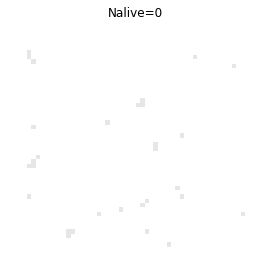

In [7]:
# Simulation:
Nalive=len(people)
while(Nalive>0): # Simulation stops when everyone dies
    for person in people:
        person.move(grid)
        person.eat(grid)
        if(person.energy>100):
            people.append(Person(grid)) # reproduce
            people[-1].xy=person.xy.copy() # easier to see the reproduction
            person.energy-=50
    Nalive=len(people)
    people=[people[i] for i in range(Nalive) if people[i].energy>0] # some people died
    plot_world(grid,people) # Plot new results
    #time.sleep(0.5)

### 2.2 Boid Model
The flocking model uses the following three rules:

1. separation (short distance): steer to avoid crowding local flockmates
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e1/Rule_separation.gif"><br>

2. alignment (medium distance): steer towards the average heading of local flockmates
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e1/Rule_alignment.gif"><br>

3. cohesion (long distance): steer to move toward the average position (center of mass) of local flockmates
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2b/Rule_cohesion.gif"><br>

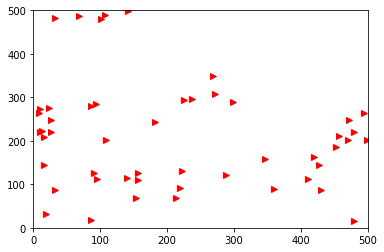

In [ ]:
# Model parameters:
Nboids=50 
world=[0,500,0,500] # world size
speed=5 
repulsion_dis=10   # repulsion distance
alignment_dis=80   # alignment distance
attraction_dis=100 # attraction distance

# Supporting functions:
class Boid:
    
    def __init__(self,world):
        world_size=max(world)
        self.position=world_size*random.rand(2) 
        temp_dir=random.rand(2)
        self.direction=temp_dir/linalg.norm(temp_dir)
        
    def move(self,world,boids,distance):
        
        # Repulsion to group position is the top priority:
        repulsion_group=[boids[j] for j in range(Nboids) if distance[j]>0 and distance[j]<=repulsion_dis]
        Nrepulsion=len(repulsion_group)
        if(Nrepulsion>0):  
            
            group_position=zeros(2)
            for r in repulsion_group:
                group_position+=r.position
            group_position/=Nrepulsion
            
            # set rather than revise the heading direction:
            self.direction=self.position-group_position
                        
        else:
            
            # Alignment to group direction:
            alignment_group=[boids[j] for j in range(Nboids) if distance[j]>repulsion_dis and distance[j]<=alignment_dis]
            Nalignment=len(alignment_group)
            if(Nalignment>0):  
                group_direction=zeros(2)
                for a in alignment_group:
                    group_direction+=a.direction # addition of unit vectors
                self.direction+=group_direction # revise the original direction
                
            # Attraction to group position:
            attraction_group=[boids[j] for j in range(Nboids) if distance[j]>alignment_dis and distance[j]<=attraction_dis]
            Nattraction=len(attraction_group)
            if(Nattraction>0):  
                group_position=zeros(2)
                for a in attraction_group:
                    group_position+=a.position
                group_position/=Nattraction
                catch_direction=(group_position-self.position)
                self.direction+=catch_direction # revise the original direction
            
        # For all cases (including the case of no neighbors at all):
        self.direction/=linalg.norm(self.direction) # make it a unit vector
        self.position=around(self.position+self.direction*speed)
        self.position=mod(self.position,max(world)) # cyclic boundary

def plot_world(world,boids):
    clf() # clear previous figure
    for b in boids:
        plot(b.position[0],b.position[1],'r>')
    axis(world)
    display(gcf()); clear_output(wait=True) # to allow dynamic plots
    
# Initialization:
boids=[Boid(world) for i in range(Nboids)] # assign each boid to a position

for t in range(100):
    
    # Calculate all pairwise distances before anyone moves:
    distance=zeros([Nboids,Nboids])
    for i in range(Nboids):
        for j in range(i+1,Nboids):
            distance[i,j]=linalg.norm(boids[i].position-boids[j].position)
    
    # Move according to the three rules:       
    for i in range(Nboids):
        boids[i].move(world,boids,distance[i,:])
        
    plot_world(world,boids)